In [61]:
%reset -f
import sys
sys.path.insert(0, "..")
from wavhandler import *
from configs import DatasetConfiguration
from utils_train import *
from configs import *
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, classification_report, make_scorer, log_loss
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import os
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Input
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import seaborn as sns
import deepdish as dd
from datahandling import *

seed = 42
np.random.seed(seed=seed)

splitting = 'custom'
data_setting = 'rawflt'

In [163]:
mydict = {"species": ["D. suzukii", "D. suzukii","D. melanogaster","D. melanogaster"],
         "box": ["Y","X", "Y","Z"],
         "before": [25732,19657,29002,24763],
         "after": [18210,14637,12126,12122]}

In [168]:
df = pd.DataFrame(mydict)
df['box'] = df['species']+' ('+df['box']+')'

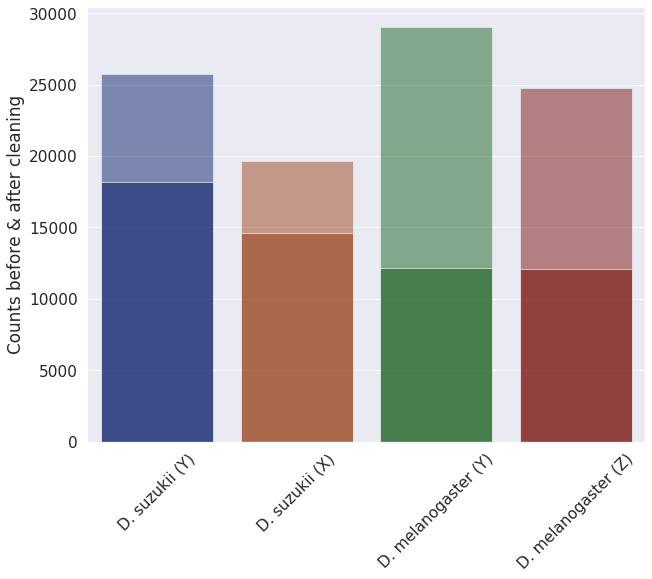

In [173]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,8))
sns.barplot(data=df, x='box',y='before', palette='dark', alpha=.5)
sns.barplot(data=df, x='box',y='after', palette='dark', alpha=.6)
plt.ylabel('Counts before & after cleaning')
plt.xlabel("")
plt.xticks(rotation=45);
plt.savefig("/home/kalfasyan/Desktop/RESULT_cleaning.png", bbox_inches='tight', format='png')

In [161]:
train = pd.read_csv(f"{TEMP_DATADIR}/df_train_{data_setting}_{splitting}.csv", index_col=False)
X_train = train.x.tolist()
y_train = train.y.tolist()
val = pd.read_csv(f"{TEMP_DATADIR}/df_val_{data_setting}_{splitting}.csv", index_col=False)
X_val = val.x.tolist()
y_val = val.y.tolist()
test = pd.read_csv(f"{TEMP_DATADIR}/df_test_{data_setting}_{splitting}.csv", index_col=False)
X_test = test.x.tolist()
y_test = test.y.tolist()
print(f"train: \n{pd.Series(y_train).value_counts()}\n")
print(f"val: \n{pd.Series(y_val).value_counts()}\n")
print(f"test: \n{pd.Series(y_test).value_counts()}")

a = pd.Series(y_train).value_counts()
b = pd.Series(y_val).value_counts()
c = pd.Series(y_test).value_counts()
df = pd.DataFrame([a,b,c])

df.columns = ['D. suzukii','D. melanogaster']
df.index = ['train','val','test']

train: 
1    13644
0     9105
dtype: int64

val: 
1    4566
0    3017
dtype: int64

test: 
1    14637
0    12126
dtype: int64


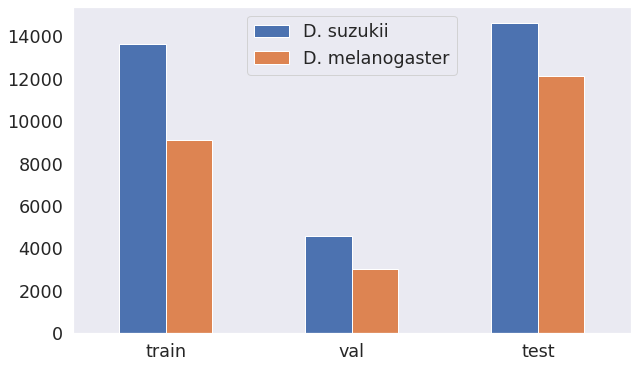

In [162]:
sns.set(font_scale=1.6)
df.plot(kind='bar', grid=False, figsize=(10,6), rot=0);